# Fruits Classifier

Total number of images: 65429.

Training set size: 48905 images (one fruit per image).

Test set size: 16421 images (one fruit per image).

Multi-fruits set size: 103 images (more than one fruit (or fruit class) per image)

Number of classes: 95 (fruits).

Image size: 100x100 pixels.

https://www.kaggle.com/moltean/fruits



### Get the data from kaggle
https://www.kaggle.com/moltean/fruits

### Parameters

In [1]:
train_file_path = 'data/fruits-360/Training'
valid_file_path = 'data/fruits-360/Test'
number_of_epochs = 20
validation_split = 0.3
batch_size = 64

# re-size all the images to this
IMAGE_SIZE = [100, 100]



In [2]:
# Import neccessary Libararies
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob


Using TensorFlow backend.


In [3]:
# useful for getting number of files
train_image_files = glob(train_file_path + '/*/*.jp*g')
valid_image_files = glob(train_file_path + '/*/*.jp*g')
# useful for getting number of classes
folders = glob(train_file_path + '/*')

In [4]:
print('Number of Images in Training Dataset = %s' % len(train_image_files))
print('Number of Images in Validation Dataset = %s' % len(valid_image_files))
print('Number of Classes in  Dataset = %s' % len(folders))

Number of Images in Training Dataset = 48905
Number of Images in Validation Dataset = 48905
Number of Classes in  Dataset = 95


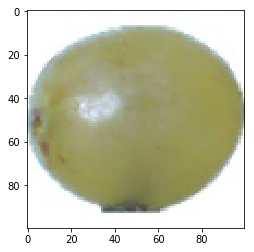

In [5]:
# look at an random Image
plt.imshow(image.load_img(np.random.choice(train_image_files)))
plt.show()

### Build Model

In [6]:
# Load pretrained VGG model on Imagenet
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [7]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [8]:
vgg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [9]:
# Add our own layer at the end
x = Flatten()(vgg.output)
# x = Dense(1024, activation='relu', name='fc1')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [10]:
# Create Model Object
model = Model(inputs=vgg.input, outputs=prediction)

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [12]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='rmsprop',
  metrics=['accuracy']
)

### Crete Image Data generator

In [13]:
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

In [14]:
# create generators
train_generator = gen.flow_from_directory(
  train_file_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)
valid_generator = gen.flow_from_directory(
  valid_file_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)

Found 48905 images belonging to 95 classes.
Found 16421 images belonging to 95 classes.


### Train The model

In [15]:
# fit the model
r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=number_of_epochs,
  steps_per_epoch=len(train_image_files) // batch_size,
  validation_steps=len(valid_image_files) // batch_size,
)


Epoch 1/20
764/764 [==============================] - 162s 212ms/step - loss: 11.3496 - acc: 0.2871 - val_loss: 10.6210 - val_acc: 0.3330
Epoch 2/20
764/764 [==============================] - 161s 210ms/step - loss: 10.4695 - acc: 0.3482 - val_loss: 10.4684 - val_acc: 0.3483
Epoch 3/20
764/764 [==============================] - 159s 208ms/step - loss: 10.2965 - acc: 0.3596 - val_loss: 10.1941 - val_acc: 0.3653
Epoch 4/20
764/764 [==============================] - 160s 210ms/step - loss: 10.1247 - acc: 0.3708 - val_loss: 10.1676 - val_acc: 0.3676
Epoch 5/20
764/764 [==============================] - 159s 207ms/step - loss: 10.0220 - acc: 0.3773 - val_loss: 10.0135 - val_acc: 0.3765
Epoch 6/20
764/764 [==============================] - 158s 207ms/step - loss: 9.9542 - acc: 0.3821 - val_loss: 10.0108 - val_acc: 0.3773
Epoch 7/20
764/764 [==============================] - 154s 201ms/step - loss: 9.6370 - acc: 0.4014 - val_loss: 9.6327 - val_acc: 0.3998
Epoch 8/20
764/764 [=================

In [16]:
# test generator to see how it works and some other useful things

# get label mapping for confusion matrix plot later
test_gen = gen.flow_from_directory(valid_file_path, target_size=IMAGE_SIZE)
print(test_gen.class_indices)
labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
  labels[v] = k

Found 16421 images belonging to 95 classes.
{'Apple Braeburn': 0, 'Apple Golden 1': 1, 'Apple Golden 2': 2, 'Apple Golden 3': 3, 'Apple Granny Smith': 4, 'Apple Red 1': 5, 'Apple Red 2': 6, 'Apple Red 3': 7, 'Apple Red Delicious': 8, 'Apple Red Yellow 1': 9, 'Apple Red Yellow 2': 10, 'Apricot': 11, 'Avocado': 12, 'Avocado ripe': 13, 'Banana': 14, 'Banana Lady Finger': 15, 'Banana Red': 16, 'Cactus fruit': 17, 'Cantaloupe 1': 18, 'Cantaloupe 2': 19, 'Carambula': 20, 'Cherry 1': 21, 'Cherry 2': 22, 'Cherry Rainier': 23, 'Cherry Wax Black': 24, 'Cherry Wax Red': 25, 'Cherry Wax Yellow': 26, 'Chestnut': 27, 'Clementine': 28, 'Cocos': 29, 'Dates': 30, 'Granadilla': 31, 'Grape Blue': 32, 'Grape Pink': 33, 'Grape White': 34, 'Grape White 2': 35, 'Grape White 3': 36, 'Grape White 4': 37, 'Grapefruit Pink': 38, 'Grapefruit White': 39, 'Guava': 40, 'Hazelnut': 41, 'Huckleberry': 42, 'Kaki': 43, 'Kiwi': 44, 'Kumquats': 45, 'Lemon': 46, 'Lemon Meyer': 47, 'Limes': 48, 'Lychee': 49, 'Mandarine': 50

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min: -68.02937 max: 151.061


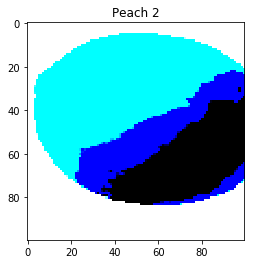

In [17]:
# should be a strangely colored image (due to VGG weights being BGR)
for x, y in test_gen:
  print("min:", x[0].min(), "max:", x[0].max())
  plt.title(labels[np.argmax(y[0])])
  plt.imshow(x[0])
  plt.show()
  break

In [18]:
def get_confusion_matrix(data_path, N):
  # we need to see the data in the same order
  # for both predictions and targets
  print("Generating confusion matrix", N)
  predictions = []
  targets = []
  i = 0
  for x, y in gen.flow_from_directory(data_path, target_size=IMAGE_SIZE, shuffle=False, batch_size=batch_size * 2):
    i += 1
    if i % 50 == 0:
      print(i)
    p = model.predict(x)
    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= N:
      break

  cm = confusion_matrix(targets, predictions)
  return cm

In [19]:
cm = get_confusion_matrix(train_file_path, len(train_image_files))
print(cm)
valid_cm = get_confusion_matrix(valid_file_path, len(valid_image_files))
print(valid_cm)

Generating confusion matrix 48905
Found 48905 images belonging to 95 classes.
50
100
150
200
250
300
350
[[492   0   0 ...   0   0   0]
 [  0 492   0 ...   0   0   0]
 [  0   0 492 ...   0   0   0]
 ...
 [ 39   0   0 ...   0   0   0]
 [ 92   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0 735]]
Generating confusion matrix 48905
Found 16421 images belonging to 95 classes.
50
100
150
200
250
300
350
[[491   0   0 ...   0   0   0]
 [  0 490   0 ...   0   0   0]
 [  0   0 492 ...   0   0   0]
 ...
 [ 62   0   0 ...   0   0   0]
 [123   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0 498]]


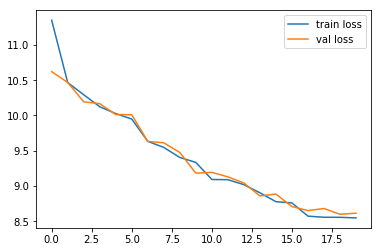

In [20]:
# plot some data

# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

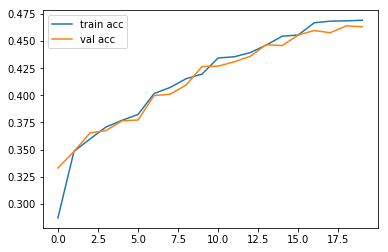

In [21]:

# accuracies
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()


In [23]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

In [24]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


Confusion matrix, without normalization
[[492   0   0 ...   0   0   0]
 [  0 492   0 ...   0   0   0]
 [  0   0 492 ...   0   0   0]
 ...
 [ 39   0   0 ...   0   0   0]
 [ 92   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0 735]]


<IPython.core.display.Javascript object>


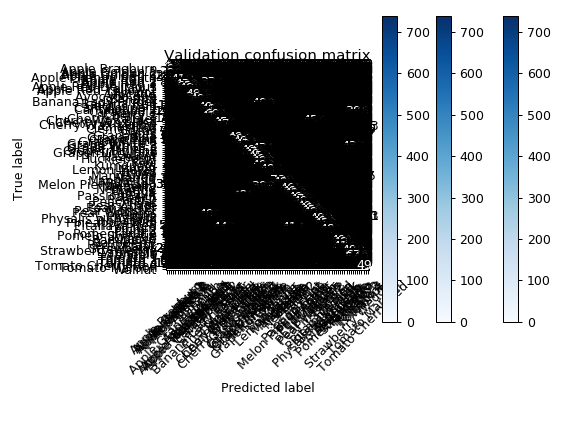

In [25]:
%matplotlib notebook
plot_confusion_matrix(cm, labels, title='Train confusion matrix')

In [27]:
plot_confusion_matrix(valid_cm, labels, title='Validation confusion matrix')

Confusion matrix, without normalization
[[491   0   0 ...   0   0   0]
 [  0 490   0 ...   0   0   0]
 [  0   0 492 ...   0   0   0]
 ...
 [ 62   0   0 ...   0   0   0]
 [123   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0 498]]
